In [21]:
file_lines = []
for line in open('minuit.out.txt', 'r'):
    file_lines.append(line)
print('the number of lines is', len(file_lines) )
n=25
print('Prameters block:', file_lines[9:n])
parameter_lines = str(file_lines[9:n])
print('\n \n')
print(parameter_lines.split())

the number of lines is 242
Prameters block: ['    NO.   NAME         VALUE      STEP SIZE      LIMITS\n', "     2 'Bg        '  -0.61953E-01  0.27133E-01     no limits\n", "     3 'Cg        '    5.5624      0.31846         no limits\n", "     7 'Aprig     '   0.16612      0.28009E-01     no limits\n", "     8 'Bprig     '  -0.38310      0.97840E-02     no limits\n", "     9 'Cprig     '    25.000      constant\n", "    12 'Buv       '   0.81048      0.16017E-01     no limits\n", "    13 'Cuv       '    4.8235      0.63844E-01     no limits\n", "    15 'Euv       '    9.9214      0.83589         no limits\n", "    22 'Bdv       '    1.0300      0.61123E-01     no limits\n", "    23 'Cdv       '    4.8463      0.29544         no limits\n", "    33 'CUbar     '    7.0597      0.80914         no limits\n", "    34 'DUbar     '    1.5481       1.0965         no limits\n", "    41 'ADbar     '   0.26880      0.80200E-02     no limits\n", "    42 'BDbar     '  -0.12730      0.36280E-02     n

In [9]:
def main():
    file =open('minuit.out.txt', 'r')
    lines = file.readlines()
    str_lines = lines.strip().split()
    header, values = lines[104], lines[106:124]
    data_dict = {h: v for h, v in zip(header, zip(*values))}
    file.close()
    print(data_dict)
main()


AttributeError: 'list' object has no attribute 'strip'

In [3]:
import os
import re
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
print(lines[104])
for line in lines[106:124]:
    #print(line)
    #words = line.strip().split('      ')#the delimeter is 6 spaces to separate the columns
    words = re.split(r"(?: '\s+)\s*", line.strip())
    #use re noncapture group, defined as (?:...)since we dont want the separators in our 
    #result.
    #print(words[0])
    #print(words[2].split())
    values= words[2].split()
    print(values)
    #for ind, word in enumerate(split_line):
    #print(split_line)
        #print(word)
#     with open('minuit.oin.txt', 'r') as second:
#         split_line
#         second.write()
    
    
infile.close()
#line.split(0)


  EXT PARAMETER                APPROXIMATE        STEP         FIRST   



IndexError: list index out of range

Explanation of the minuit.in.txt format:

set title new 13p HERAPDF parameters 1 'Ag' 0.0000 0. 2 'Bg' -0.226958 1.126400e-03 .....

The first 3 lines set title and announces MINUIT the list of parameters
The index of parameters is the first column and it is hardwired to the source code.
1 -10 gluon parameters
11-20 uval parameters 21-30 dval parameters 31-40 Ubar parameters 41-50 Dbar parameters 51-60 U parameters 61-70 D parameters 71-80 Sea parameters 81-90 Delta parameters 91-100 other parameters: alphas (95), fs=Dbar/str (96), fc=Ubar/ch (97)

second column represents just user defined names
third column: input value for the parameter
forth column: step size (usually chosen of the same order as of the error) IMPORTANT: -> if step size value is 0. then this parameter is FIXED
fifth colum: lower boundary of the fit parameter
sixth column: upper boundary of the fit parameter -> if boundaries are not mentioned then there are no boundaries!

## Workflow

go to example_run directory. mkdir run. cp example_run/* run. cd run. xfitter. cd output. python generate_datasets.py.

See how 
#! /bin/bash

for ((i=0; i=100; i++))
    do cp example_run/input/steerings.txt dataset_{}.format(i)
    do cp example_run/input/ewparaparams.txt
    cp example_run/input/minuit.in_{}.txt.format(i) dataset_{}/minuit.txt.format(i)
    cd dataset_{i}
    mkdir run
    cp input/* run
    cd run
    xfitter
    

In [72]:
import os
import re; import pandas as pd
params=[]
generated_params = []
error_list=[]
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
#print(lines[104])
# for line in lines[106:109, 111:120]:
from itertools import *
#make a chain iterator of our wanted lines from the output file, we want to exclude
#those lines that have "constant" for the error, since these are not the PDF parameters and we can't use them
chain = chain(islice(lines, 106, 111), islice(lines, 111, 121))
#for line in lines[106:121]:
for line in chain:
    #print(line)
    #words = line.strip().split('\s+')#the delimeter is 6 spaces to separate the columns
    words = line.strip().split()
    
    #words = re.split(r"(?: '\s*)\s*", line.strip())
    #df = pd.read_table(words)
    #use re noncapture group, defined as (?:...)since we dont want the separators in our 
    #result.
    #print(words[2])
    values= words[2]
    errors=words[3]
    #print(errors)
    for value in values.split():
#         #print(i)
         params.append(float(value))
    for error in errors.split():
        if error =='constant':
            error_list.append(0.0)
        else:
            error_list.append(float(error))
    
#         sampled_param = np.random.uniform(low = j-error, high=j+error)
# means=np.array(means).astype(float)
        
#print(means)
    #print(values)
    #print(words[2].split())
    #values= words[2].split()[0]
    #print(values)4
    #for ind, word in enumerate(split_line):
    #print(split_line)
        #print(word)
#     with open('minuit.oin.txt', 'r') as second:
#         split_line
#         second.write()
    
    
infile.close()
params = np.asarray(params); error_list =np.asarray(error_list)

#############GENERATE PARAMETERS
generated_params=[]
for i in range(len(params)):
    param, error = params[i], error_list[i]
    generated_param = np.random.uniform(low = param-error, high=param+error)
    generated_params.append(generated_param)



    
    
    
print( params, generated_params, '\n\n', len(params), len(generated_params))

[-0.061856  5.5593    0.16618  -0.383    25.        0.81056   4.8239
  9.9226    1.0301    4.8456    7.0603    1.5439    0.26877  -0.12732
  9.581   ] [-0.0842340613728739, 5.529697673752157, 0.13842461004582488, -0.37579955532228787, 25.0, 0.8058599022674593, 4.81898755831388, 9.709957094897144, 1.0119363155119232, 4.937203165029702, 7.077450095037866, 1.855451516214415, 0.2725911372882104, -0.1265561800140813, 9.835162114772] 

 15 15


In [71]:
############WRITE GENERATED PARAMETERS INTO NEW MINUIT.IN FILE
with open('minuit_ex.in.txt', 'w') as second:
    second.write('set title\n')
    second.write('new  14p HERAPDF\n')
    second.write('parameters\n')
    #lets put 0 for the fourth column, meaning that this parameter is fixed
    second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(generated_params[0])+ '    '+'0.\n')
    second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(generated_params[1])+ '    '+'0.\n')
    second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(generated_params[2])+ '    '+'0.\n')
    second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(generated_params[3])+ '    '+'0.\n')
    second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(generated_params[4])+ '    '+'0.\n')
    second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(generated_params[5])+ '    '+'0.\n')
    second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(generated_params[6])+ '    '+'0.\n')
    second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(generated_params[7])+ '    '+'0.\n')
    second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(generated_params[8])+ '    '+'0.\n')
    second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(generated_params[9])+ '    '+'0.\n')
    second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(generated_params[10])+ '    '+'0.\n')
    second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(generated_params[11])+ '    '+'0.\n')
    second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(generated_params[12])+ '    '+'0.\n')
    second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(generated_params[13])+ '    '+'0.\n')
    second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(generated_params[14])+ '    '+'0.\n')
    second.write('\n\n\n')
    second.write('migrad 200000\n')
    second.write('hesse\n')
    second.write('hesse\n')
    second.write('set print 3\n\n')
    second.write('return')


Using numpy

In [30]:
import itertools as IT
with open(filename, 'r') as f:
    lines = IT.chain(IT.islice(f, 0, 4), IT.islice(f, 5, 14) )
arr = np.genfromtxt(lines)


ValueError: I/O operation on closed file.

In [25]:
import numpy as np
#make a list of dtypes for each of the columns that we want

dtype1 = np.dtype([('NO.', 'int'), ('NAME', 'str'), ('VALUE', 'float32'), ('ERROR', 'float32')])
a = np.loadtxt(filename, dtype=dtype1, skiprows=106,  max_rows=4, usecols=(0, 1, 2, 3))
#np.loadtxt(filename, dtype)
a['VALUE']

array([-0.061856,  5.5593  ,  0.16618 , -0.383   ], dtype=float32)

In [6]:
words

['43', 'CDbar', '9.5810', '0.60834', '0.53648E-02', '0.24546E-02']

In [27]:
import pandas as pd
df = pd.read_csv(filename, names=['NO','NAME','VALUE','ERROR'])[95:112]
#pd.read_csv(filename)ERROR
df.NO.apply(lambda x: pd.Series(str(x).split("\s+")))
#df.columns=['NO','NAME','VALUE','ERROR']

,0
95,2 Bg -0.61856E-01 0.25134E-01 ...
96,3 Cg 5.5593 0.10838 ...
97,7 Aprig 0.16618 0.34574E-01 ...
98,8 Bprig -0.38300 0.76253E-02 ...
99,9 Cprig 25.000 constant
100,12 Buv 0.81056 0.53604E-02 ...
101,13 Cuv 4.8239 0.29342E-01 ...
102,15 Euv 9.9226 0.27481 ...
103,22 Bdv 1.0301 0.23240E-01 ...
104,23 Cdv 4.8456 0.12584 ...


In [138]:
len(np.array(means))
means=np.array(means).astype(np.float)
means

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([-0.061856,  5.5593  ,  0.16618 , -0.383   , 25.      ,  0.81056 ,
        4.8239  ,  9.9226  ,  1.0301  ,  4.8456  ,  7.0603  ,  1.5439  ,
        0.26877 , -0.12732 ,  9.581   ,  0.118   ,  0.4     ,  0.      ])

In [131]:

def covariance_matrix(X):
    m = len(X) 
    mean = np.mean(X)
    cov_matrix = (X - mean).T.dot((X - mean)) / m-1
    np.random.seed(2020)
    return cov_matrix + 0.00001 
cov_mat_sig = np.array(covariance_matrix(means))
cov_mat_sig

array(36.26220508)

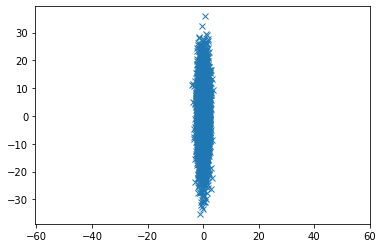

In [113]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # di
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [73]:
#for line in lines[9:n]:
line0 = lines[9]
import re
re.split('      ', line0).lstrip()

AttributeError: 'list' object has no attribute 'lstrip'

In [50]:
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
with open('minuit.in.txt', 'w') as second:
    for line in lines[9:n]:
        split_line = line.strip().split('      ')#the delimeter is 6 spaces to separate the columns
        for i in split_line:
            second.write(i)
infile.close()
second.close()

$E_{photon} =  h \ c/\lambda$

$E_{delivered} = 5 \times 70$

$E_{delivered} = N E_{photons}$

In [73]:
h = 6.626*10**(-34)
E_d = 5*70
c=3*10**8
l=1*10**(-9)
E_photon = h*c /l 
n = E_d/E_photon
n

1.7607405171546435e+18